In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = torch.tensor([[i for i in range(100)] for _ in range(1000)])
print(X.shape)
y = (torch.sin(X) + .3*torch.randn(1000,100))


torch.Size([1000, 100])


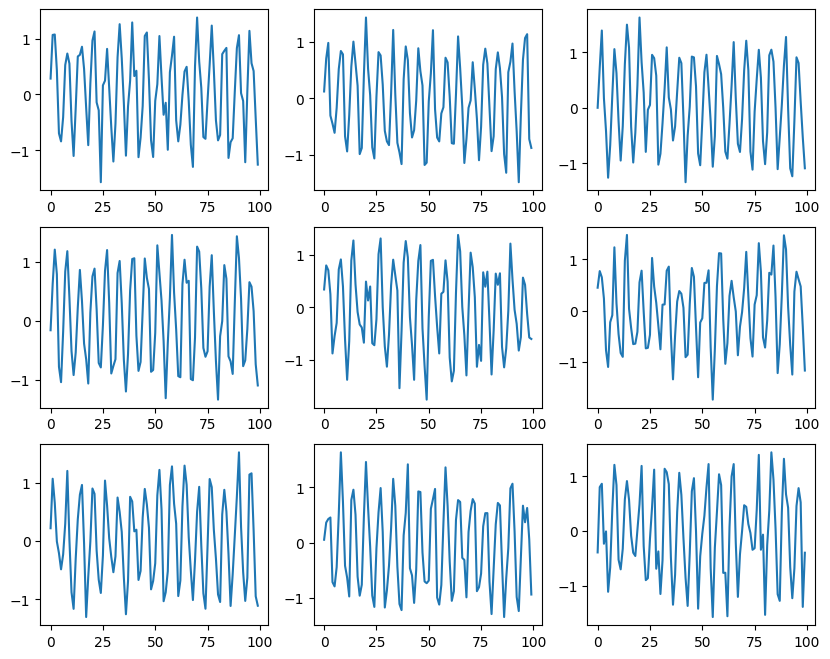

In [3]:
fig = plt.figure(figsize=(10,8))
for i,x in enumerate(X[:9]):
    ax = fig.add_subplot(3,3,i+1)
    ax.plot(x,y[i])

In [4]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.l1 = nn.LSTMCell(1, 51)
        self.l2 = nn.LSTMCell(51, 51)
        self.l3 = nn.Linear(51, 1)
        self.h_t = torch.zeros(51, 51, dtype=torch.float)
        self.c_t = torch.zeros(51, 51, dtype=torch.float)
        self.h_t2 = torch.zeros(51, 51, dtype=torch.float)
        self.c_t2 = torch.zeros(51, 51, dtype=torch.float)
        
        

    def forward(self, x):
        h_t = self.h_t 
        print(h_t.dtype)
        c_t = self.c_t 
        h_t2 = self.h_t2
        c_t2 = self.c_t2
        print(h_t.shape)
        
        h_t, c_t = self.l1(x, (h_t, c_t))
        h_t2, c_t2 = self.l2(h_t, (h_t2, c_t2))
        output = self.l3(h_t2)
        
        return output


In [5]:
lstm = LSTM()
lstm(torch.tensor([1], dtype=torch.float))

torch.float32
torch.Size([51, 51])


RuntimeError: The size of tensor a (204) must match the size of tensor b (51) at non-singleton dimension 2

In [ ]:
rnn = nn.LSTMCell(10, 20)  # (input_size, hidden_size)
input = torch.randn(2, 3, 10)  # (time_steps, batch, input_size)
hx = torch.randn(3, 20)  # (batch, hidden_size)
cx = torch.randn(3, 20)
output = []
for i in range(input.size()[0]):
    print(i)
    hx, cx = rnn(input[i], (hx, cx))
    output.append(hx)
output = torch.stack(output, dim=0)
output